<a href="https://colab.research.google.com/github/YoussefMhasni/Audit-risk-detection-project/blob/main/Better_world_test_tech1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse du dataset

In [ ]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Import dataset
data=pd.read_csv('text_emotion.csv',index_col=False)

In [ ]:
# display data
data

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
# Validate quality of data (checking missing values, data types, duplicated rows, etc)
#data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
# is the data contains duplicates rows?
data.duplicated().sum()

0

In [ ]:
# Number of rows and columns
data.shape

(40000, 4)

In [ ]:
# count unique values for each columns
data.nunique()

tweet_id     40000
sentiment       13
author       33871
content      39827
dtype: int64

In [ ]:
"""The principal feature "Content" contains some duplicates values, (but the concerned observation is unique). Also
the data has 13 labels as sentiment. So we can coclude that we have multi classification problem

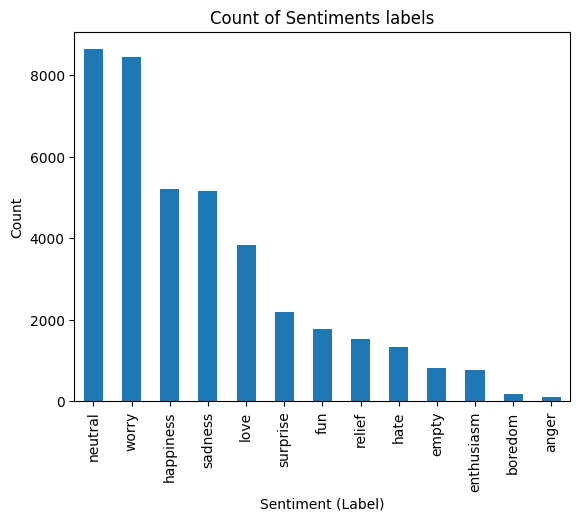

In [ ]:
data['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment (Label)')
plt.ylabel('Count')
plt.title('Count of Sentiments labels')
plt.show()

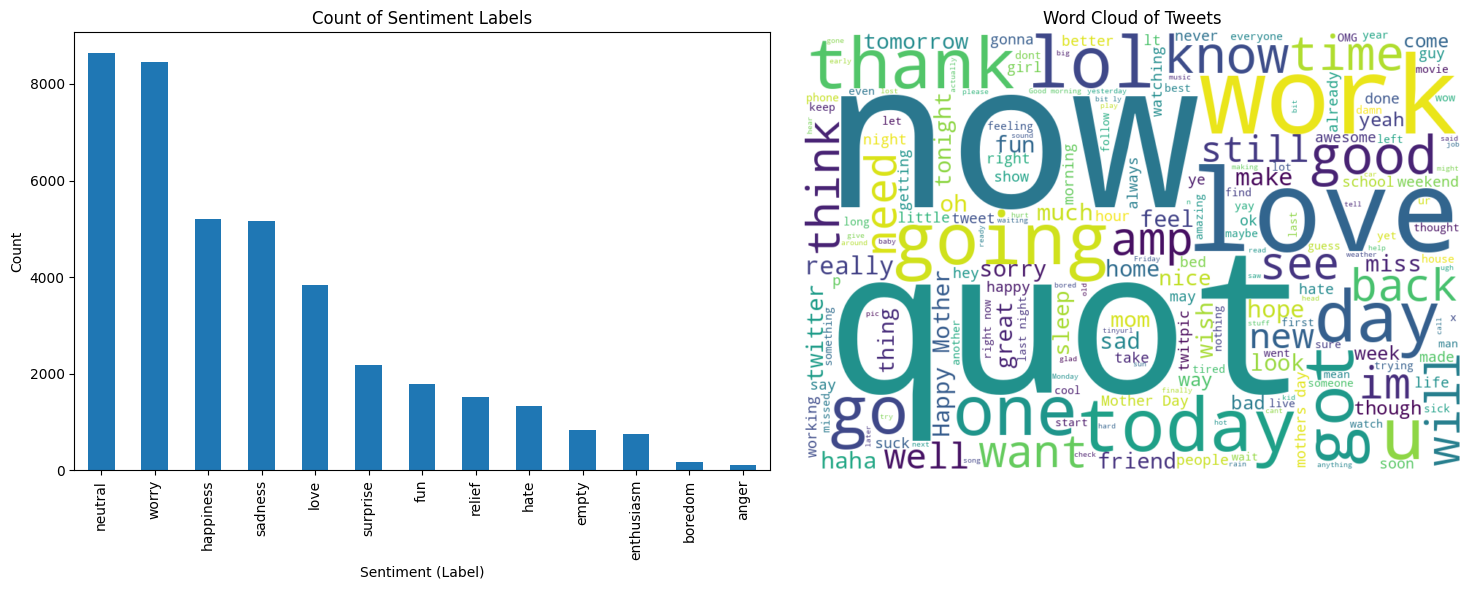

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot bar chart for sentiment counts
data['sentiment'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Sentiment (Label)')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Sentiment Labels')

# Concatenate all tweets into a single string
all_text = ' '.join(data['content'])

""" Generate a word cloud based on WordCloud Library (It handles stopwords and special characters
by removing them from the text using regex and a predefined set of stopwords)"""
wordcloud = WordCloud(width=900, height=600, background_color='white').generate(all_text)

# Plot word cloud
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of Tweets')

# Show the plot
plt.tight_layout()
plt.show()

# Features engineering

In [ ]:
"""Après le nettoyage du texte en supprimant les mots vides, la ponctuation et les caractères spéciaux,
nous pouvons utiliser plusieurs techniques pour générer des fonctionnalités pour notre analyse de sentiment.
Tout d'abord, la tokenisation nous permet de diviser le texte en mots ou en sous-chaînes de caractères.
Aussi, en utilisant les n-grammes, nous pouvons capturer les séquences de mots consécutifs.
Nous pouvons également baser des caractéristiques sur la polarité des mots linguistiquement,
en attribuant des valeurs positives, négatives ou neutres en fonction du sentiment associé à chaque mot.
De plus, la méthode TF-IDF peut être utilisée pour évaluer l'importance des mots dans le contexte du corpus
 entier. Enfin, pour transformer les sorties en valeurs numériques, nous pouvons utiliser l'encodage one-hot
 pour représenter les catégories, ce qui est particulièrement utile dans notre cas où nous avons 13
 étiquettes de classification et ca convient le modèle leur entrainement par comparison avec dummy
 encoding.

In [ ]:
"""
Pour exploiter des modèles pré-entraînés et des architectures existantes afin de générer
des fonctionnalités pour le traitement du problème de classification, nous pouvons utiliser des
techniques telles que les embeddings de mots. Par exemple, en utilisant BERT, un modèle de langage pré-entraîné,
 nous pouvons capturer le contexte du texte en représentant chaque mot sous forme d'un vecteur denses.
 De plus, d'autres modèles comme Word2Vec et GloVe peuvent être utilisés pour générer des embeddings de mots
 basés sur des modèles pré-entraînés. Ces embeddings peuvent ensuite être utilisés comme fonctionnalités
 dans nos modèles de classification pour capturer les relations sémantiques entre les mots et améliorer
 les performances de classification. En outre, des architectures de réseaux neuronaux pré-entraînées telles
 que les réseaux de neurones multicouches (MLP) et les réseaux de neurones récurrents (RNN, LSTM) peuvent être
 utilisées pour extraire des caractéristiques importantes du texte. Ces architectures peuvent être adaptées et
 fine-tunées pour notre tâche de classification spécifique, ce qui peut conduire à des modèles plus performants. Enfin, des techniques de transfert d'apprentissage peuvent également être utilisées en exploitant des modèles pré-entraînés dans des domaines
similaires pour extraire des fonctionnalités pertinentes pour notre problème de classification. Egalement on peut
modiliser notre problème par des algorithmes de machine learning comme NaiveBayes, RandomForest, XGBoost, etc

Également, on peut utiliser des LLMs tels que ChatGPT et Mistral 7B, en exploitant les grandes quantités
de données textuelles utilisées pour les entraîner,
soit directement en utilisant les techniques de prompting, soit par fine-tuning à travers la technique RAG.

# Classification

In [ ]:
"""
Pour aborder le problème de classification, nous pouvons suivre un framework bien défini comprenant les éléments suivants :

a) Processus expérimental :

    Indicateur de performance : Choisir une métrique appropriée pour évaluer les performances du modèle
    de classification, comme la précision,
    le rappel, la F1-score, ou l'aire sous la courbe ROC (AUC-ROC).
    Méthodologie de test : Divisez les données en ensembles d'entraînement et de
    test pour évaluer les performances du modèle. Utilisez la validation croisée si nécessaire pour
    obtenir des estimations de performance plus robustes.
    Itération : Répéter le processus expérimental plusieurs fois en ajustant les paramètres du modèle,
    en explorant de nouvelles techniques de prétraitement des données ou de feature engineering, et
    en évaluant régulièrement les performances du modèle pour améliorer les résultats.

b) Feature engineering et classification :

    Vectorisation : Transformer les données textuelles en vecteurs numériques
    exploitables par les algorithmes de classification. Utiliser des techniques de vectorisation
    telles que TF-IDF, Bag-of-Words, Word embeddings (comme Word2Vec, GloVe) ou des embeddings de
    phrases (comme BERT).
    Algorithme de classification : Choisir un algorithme de classification approprié pour
    notre problème, les classifieurs à base d'arbres
     (comme les arbres de décision, les forêts aléatoires, les XGBoost) [dans le cas de transformation d'output
     par l'utilisation dummy encoding], Naive Bayes,
     les classifieurs ensemblistes, ou les réseaux de neurones profonds.
     Expérimenter avec différents algorithmes pour trouver celui qui offre les meilleures
     performances pour notre ensemble de données.

# Résultat et Analyse

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [ ]:
Y = data['sentiment']
data=data['content']
# Tokenisation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=25)

# Entraînement du modèle Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de train
y_pred = clf.predict(X_train)

# Calcul de l'accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5317


In [ ]:
X_train.shape

(30000, 48212)

In [ ]:
X_test.shape

(10000, 48212)

In [ ]:
# we have a lot of features here, but we will try our baseline model

In [ ]:
# Prédiction sur l'ensemble de train
y_pred = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

Accuracy: 0.3111
Precision: 0.20311920533639033
Recall: 0.13597983975994488
F1 Score: 0.12203458459448895
ROC AUC Score: 0.5960768183428887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


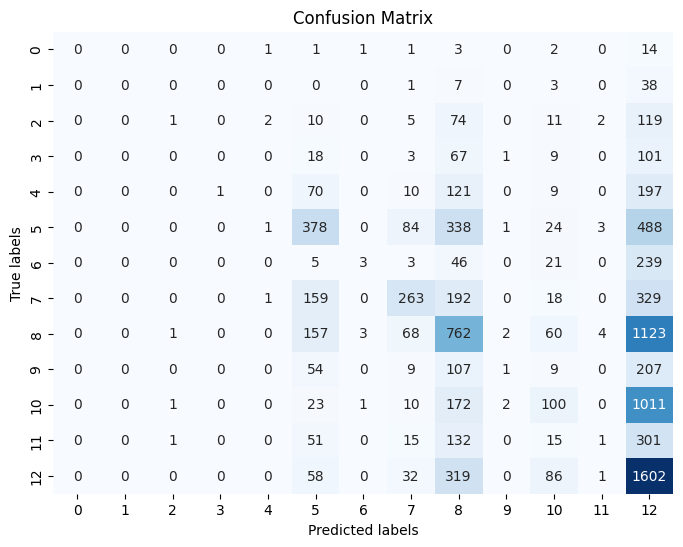

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Choix de NaiveBayes
"""On a choisi le classifieur Naive Bayes pour la modélisation pour plusieurs raisons convaincantes :

    Simplicité et efficacité : Le classifieur Naive Bayes est simple à comprendre, à mettre en œuvre et à entraîner. Il ne nécessite pas beaucoup de données pour estimer les paramètres et peut être efficace même avec un petit ensemble de données.

    Bonne performance en pratique : Malgré sa simplicité, le classifieur Naive Bayes peut offrir de bonnes performances dans de nombreuses applications réelles, notamment dans le domaine de la classification de texte, de la détection de spam, et de la catégorisation de documents.

    Traitement efficace des variables catégorielles : Il est particulièrement adapté aux problèmes de classification avec des variables catégorielles ou des données textuelles, car il peut gérer efficacement des ensembles de données avec un grand nombre de caractéristiques.

    Interprétabilité : Les prédictions du classifieur Naive Bayes sont faciles à interpréter car il fournit une probabilité pour chaque classe, ce qui permet de comprendre le raisonnement derrière les prédictions.

    Peu de paramètres à ajuster : Il y a peu de paramètres à ajuster dans le modèle Naive Bayes, ce qui le rend moins sujet au surajustement par rapport à des modèles plus complexes.

    Évite le problème de la multicollinéarité : Étant donné que le classifieur Naive Bayes suppose que les caractéristiques sont indépendantes, il évite le problème de la multicollinéarité souvent rencontré dans d'autres modèles, ce qui peut conduire à des estimations de paramètres instables

In [ ]:
"""
a) Quelle performance peut-on espérer obtenir ?
La performance attendue d'un classifieur simple comme le Naive Bayes dépend fortement de
la nature des données et de la séparabilité entre les classes. Dans les cas où les données sont
linéairement séparables et les classes sont bien distinctes, on peut s'attendre à une performance
relativement bonne. Cependant, si les données sont très bruyantes ou si les classes se chevauchent
considérablement, la performance peut être limitée.

b) Quelle performance obtient-on en première approche ?
En première approche, sans optimisation des paramètres ou des caractéristiques, la performance du
classifieur Naive Bayes peut être modérée. Elle peut être influencée par la présence de features pertinentes,
la taille et la qualité de l'ensemble de données, ainsi que la présence de biais ou de bruit.

c) Quelles autres actions (paramètres / features / modélisation / algorithme) pourraient apporter de la performance? Dans quel ordre les implémenter ?
Pour améliorer la performance du classifieur Naive Bayes, voici quelques actions possibles :

    -Sélection des caractéristiques : Nous pouvons identifier les caractéristiques les plus informatives dans
    notre ensemble de données et éliminer celles qui sont redondantes ou non pertinentes. Cela permettra
    de réduire la dimensionnalité de nos données et d'améliorer la qualité de nos caractéristiques.
    Dans ce contexte, nous pouvons nous appuyer sur la technique TF-IDF.

    Prétraitement des données : Nous pouvons appliquer différentes techniques de prétraitement,
    telles que la normalisation ou la standardisation des données, la réduction de la dimensionnalité ou
    le nettoyage des
    données pour améliorer la qualité de nos features. Cela peut contribuer à rendre nos données plus
    cohérentes et à réduire les effets du bruit.

    -Optimisation des hyperparamètres : Nous devons rechercher les meilleurs hyperparamètres pour
    notre modèle Naive Bayes. Par exemple, nous pouvons ajuster le paramètre de lissage pour améliorer
    les performances du modèle en utilisant des techniques comme la validation croisée pour trouver
    la meilleure configuration.

    -Utilisation d'autres algorithmes : Nous pouvons également explorer l'utilisation d'autres algorithmes
    de classification, tels que les arbres de décision, les SVM ou les réseaux de neurones comme MLP.
    En comparant les performances de ces différents algorithmes, nous pouvons déterminer celui qui
    convient le mieux à notre ensemble de données spécifique.

    -Enrichissement des données : Si possible, nous pouvons envisager d'ajouter des données
    supplémentaires à notre ensemble de données existant ou d'utiliser des techniques de
    génération de données synthétiques pour augmenter la diversité et la taille de notre ensemble de données.
    Cela peut aider à améliorer la robustesse de notre modèle et à réduire les risques de surapprentissage.

En fonction de nos ressources disponibles, nous pouvons mettre en œuvre ces actions dans un ordre adapté, en commençant par les plus simples et les plus susceptibles d'avoir un impact significatif sur la performance, puis en progressant vers des techniques plus complexes ou coûteuses en termes de calcul.